<a href="https://colab.research.google.com/github/Megha2004/HealthCareAnalytic/blob/main/Hospital_Readmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/patient_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,time_in_hospital,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6.0,25.0,1.0,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1.0,1.0,3.0,NaN,...,No,No,Up,No,No,No,No,No,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1.0,1.0,2.0,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1.0,1.0,2.0,NaN,...,No,No,Up,No,No,No,No,No,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1.0,1.0,1.0,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO


In [ ]:
print(df.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'diabetesMed', 'readmitted'],
      dtype='object')


In [ ]:
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

print(f"There are {len(medications)} medications represented as columns in the dataset.")

There are 23 medications represented as columns in the dataset.


Hospital admissions and unique patients in the dataset

In [ ]:
n_admissions=df['encounter_id'].nunique()
n_patients=df['patient_nbr'].nunique()

print("Number of admissions:",n_admissions)
print("Number of patients:",n_patients)

Number of admissions: 49918
Number of patients: 38172


Patients who have more than one hospital admission

In [ ]:
adm_per_patient=df['patient_nbr'].value_counts().reset_index()
adm_per_patient.columns=['patient_nbr','count']
multiple_adm=adm_per_patient[adm_per_patient['count']>1]

In [ ]:
print(f"Proportion of patients that have multiple admissions: {multiple_adm['patient_nbr'].nunique()/n_patients:.2%}")
print(f"Maximum number of admissions for a given patient: {multiple_adm['count'].max()}")

Proportion of patients that have multiple admissions: 18.90%
Maximum number of admissions for a given patient: 23


Admission type

In [ ]:
admission_type = pd.read_csv("/content/admission_type_id.csv")
admission_type

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [ ]:
missing_values = ['nan', 'Not Available', 'Not Mapped']
admission_type['description'] = admission_type['description'].replace(missing_values, np.nan)

In [ ]:
admission_type.columns = ['admission_type_id', 'admission_type']

In [ ]:
df = df.merge(admission_type, on='admission_type_id')

In [ ]:
df['admission_type'].value_counts()

Emergency        24217
Urgent            9688
Elective          8365
Newborn              7
Trauma Center        2
Name: admission_type, dtype: int64

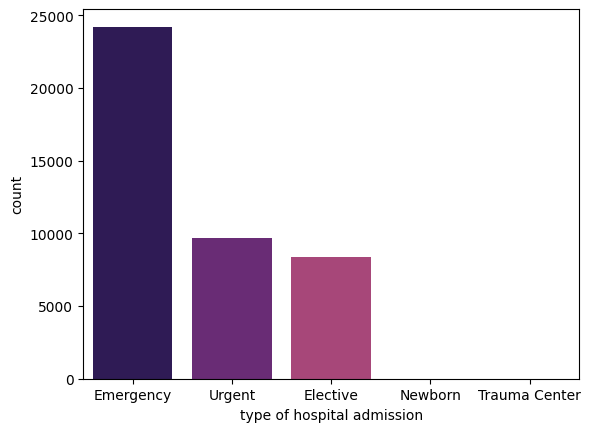

In [ ]:
import seaborn as sns
sns.countplot(x='admission_type', data=df, palette='magma')
plt.xlabel('type of hospital admission')
plt.show()

Discharge location

In [ ]:
discharge_disposition = pd.read_csv("/content/discharge_disposition_id.csv")
discharge_disposition.sample(n=5, random_state=416)

,discharge_disposition_id,description
13,14,Hospice / medical facility
8,9,Admitted as an inpatient to this hospital
14,15,Discharged/transferred within this institution...
20,21,"Expired, place unknown. Medicaid only, hospice."
29,29,Discharged/transferred to a Critical Access Ho...


In [ ]:
discharge_disposition['expired'] = discharge_disposition['description'].str.lower().str.contains('expired')

In [ ]:
discharge_expired = discharge_disposition[discharge_disposition['expired']==True]
discharge_expired

,discharge_disposition_id,description,expired
10,11,Expired,True
18,19,"Expired at home. Medicaid only, hospice.",True
19,20,"Expired in a medical facility. Medicaid only, ...",True
20,21,"Expired, place unknown. Medicaid only, hospice.",True


In [ ]:
expired_ids = discharge_expired['discharge_disposition_id'].tolist()
print(f"discharge_disposition_id's that indicate an expired patient: {expired_ids}")

discharge_disposition_id's that indicate an expired patient: [11, 19, 20, 21]


In [ ]:
df = df[df['discharge_disposition_id'].isin(expired_ids)]

In [ ]:
n_patients_nonexpired = df['patient_nbr'].nunique()
print(f"Original number of patients: {n_patients:,}")
print(f"Number of expired patients: {n_patients-n_patients_nonexpired:,}")
print(f"After filtering out expired patients: {n_patients_nonexpired:,}")

Original number of patients: 38,172
Number of expired patients: 38,172
After filtering out expired patients: 0


Converting Medication Features From Categorical to Boolean

In [ ]:
df[medications[0]].value_counts()

Series([], Name: metformin, dtype: int64)

In [ ]:
for m in medications:
    df[f'{m}_bool'] = np.where(df[m]=='No', 0, 1)
    df = df.drop(columns=m)

In [ ]:
prevalence = []

for m in medications:
    patient_meds = df.groupby('patient_nbr')[f'{m}_bool'].sum().reset_index()
    patient_meds[f'{m}_bool'] = patient_meds[f'{m}_bool'].astype(bool)
    n_patients_on_med = patient_meds[f'{m}_bool'].sum()
    proportion = n_patients_on_med/n_patients
    prevalence.append(proportion)

In [ ]:
medication_counts = pd.DataFrame({'medication': medications, 'prevalence':prevalence})
medication_counts = medication_counts.sort_values(by='prevalence', ascending=False)
medication_counts.head()

,medication,prevalence
0,metformin,0.0
12,miglitol,0.0
21,metformin-rosiglitazone,0.0
20,glimepiride-pioglitazone,0.0
19,glipizide-metformin,0.0


Target Variable

In [ ]:
df1=pd.read_csv("/content/patient_data.csv")
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,time_in_hospital,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,3,NaN,...,No,No,Up,No,No,No,No,No,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,2,NaN,...,No,No,Up,No,No,No,No,No,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,1,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO


In [ ]:
df1['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [ ]:
df1['readmitted_bool'] = np.where(df1['readmitted']=='NO', 0, 1)
df1['readmitted_bool'].value_counts()

0    54864
1    46902
Name: readmitted_bool, dtype: int64

<Axes: >

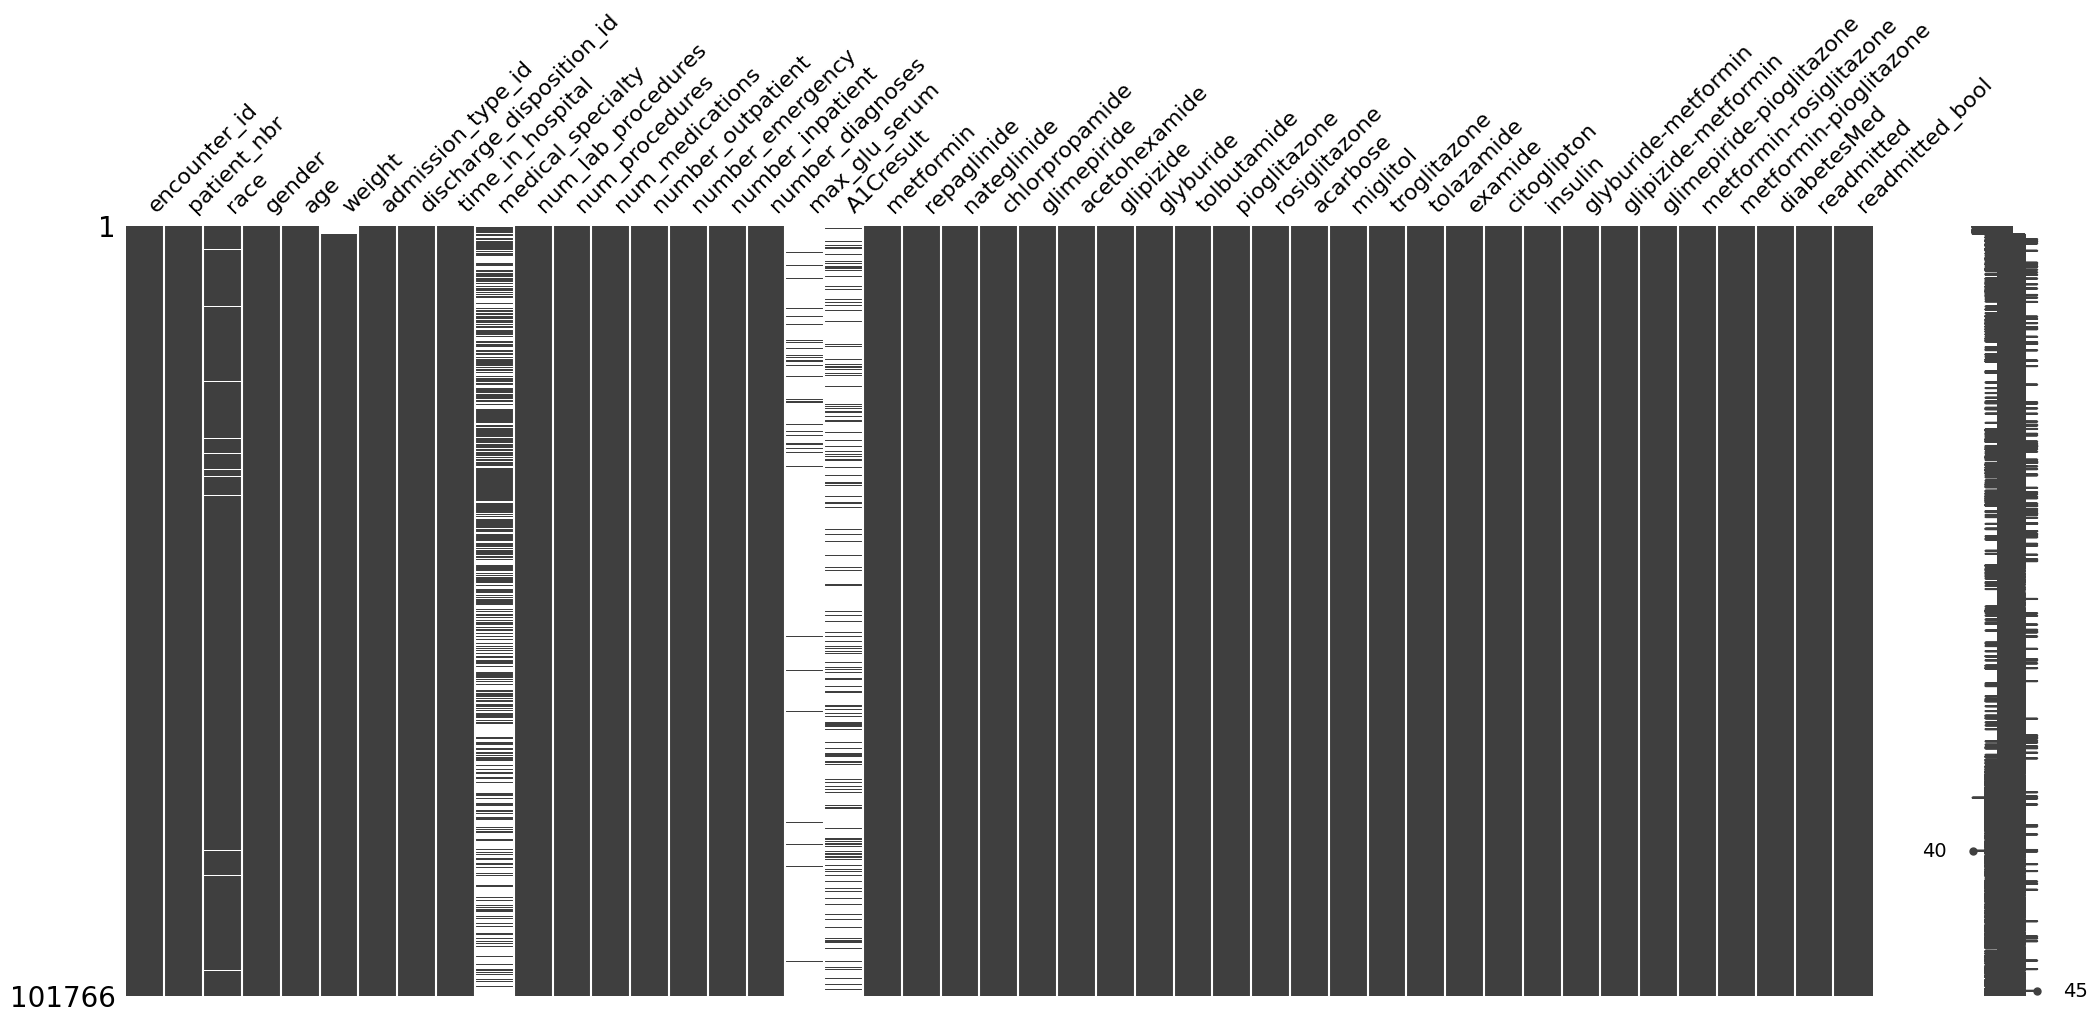

In [ ]:
import missingno as msno
msno.matrix(df1)

Patient Demographics: Age and Gender

Text(0.5, 1.0, 'Distribution of Age')

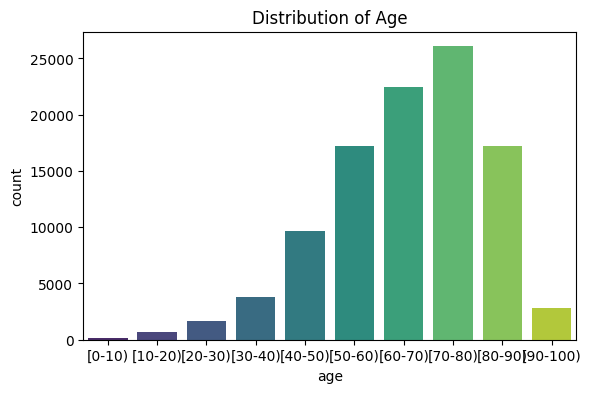

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.countplot(x='age', data=df1, palette='viridis')
plt.title("Distribution of Age")

In [ ]:
df1['gender'].value_counts(normalize=True)

Female    0.537602
Male      0.462398
Name: gender, dtype: float64

Number of Diagnoses, Procedures, Medications

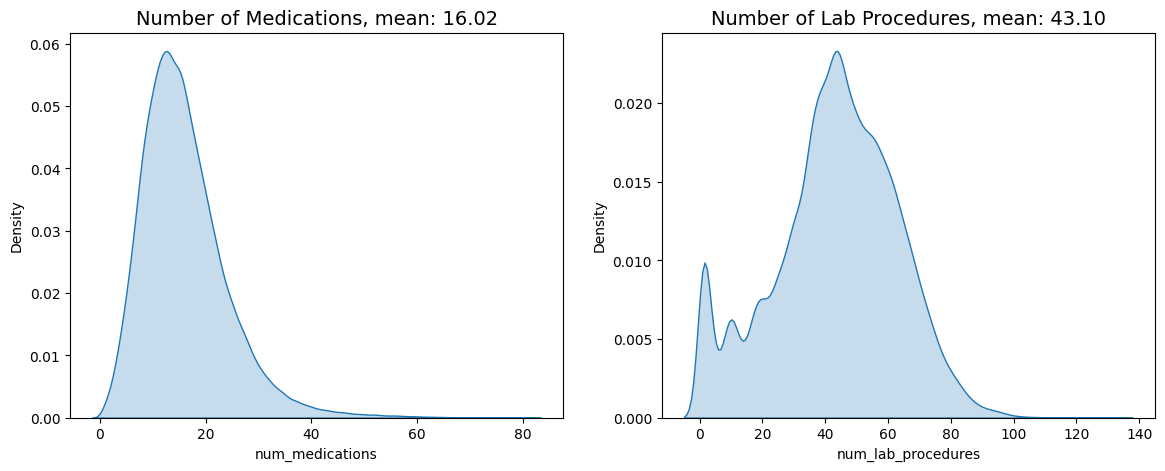

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.kdeplot(df1['num_medications'], shade=True, legend=False)
plt.title(f"Number of Medications, mean: {df1['num_medications'].mean():.2f}", size=14)

plt.subplot(1,2,2)
sns.kdeplot(df1['num_lab_procedures'], shade=True, legend=False)
plt.title(f"Number of Lab Procedures, mean: {df1['num_lab_procedures'].mean():.2f}", size=14)
plt.show()

In [ ]:
medical_specialties = df1['medical_specialty'].value_counts().reset_index()
medical_specialties.columns = ['specialty', 'count']
medical_specialties['prevalence'] = medical_specialties['count']/len(df1)
print(f"There are {df1['medical_specialty'].nunique()} medical specialties.")
medical_specialties.head(10)

There are 72 medical specialties.


,specialty,count,prevalence
0,InternalMedicine,14635,0.143810
1,Emergency/Trauma,7565,0.074337
2,Family/GeneralPractice,7440,0.073109
3,Cardiology,5352,0.052591
4,Surgery-General,3099,0.030452
5,Nephrology,1613,0.015850
6,Orthopedics,1400,0.013757
7,Orthopedics-Reconstructive,1233,0.012116
8,Radiologist,1140,0.011202
9,Pulmonology,871,0.008559


Proportion of patients were on diabetes medication during their hospital stay

In [ ]:
df1['diabetesMed'].value_counts(normalize=True)

Yes    0.770031
No     0.229969
Name: diabetesMed, dtype: float64

In [ ]:
df1['A1Cresult'].value_counts(normalize=True)

>8      0.482783
Norm    0.293219
>7      0.223998
Name: A1Cresult, dtype: float64

In [ ]:
print(f"Proportion of hospital admissions with missing A1C result: {df1['A1Cresult'].isna().sum()/len(df1):.2%}")

Proportion of hospital admissions with missing A1C result: 83.28%


In [ ]:
categorical = ['race', 'admission_type']

for c in categorical:
    df = pd.concat([df, pd.get_dummies(df[c], prefix=c)], axis=1)
    df.drop(columns=c)


In [ ]:
df1['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64